In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


CHECKING NULL & DUPLICATE VALUES

In [19]:
print(df.isna().sum())
print(f"duplicated values : {df.duplicated().sum()}")

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
duplicated values : 0


UNIQUE VALUES

In [21]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

NUMERICAL AND CATEGORICAL DATA

In [27]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
print("Numeric Featues - " + str(numeric_features))
categorical_data=[feature for feature in df.columns if df[feature].dtype=='O']
print("\nCategorical Features - " + str(categorical_data))

Numeric Featues - ['math_score', 'reading_score', 'writing_score']

Categorical Features - ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


ADDING NEW FEATURES

 -total score
 
 -average score

In [28]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [29]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


VISUALIZATION

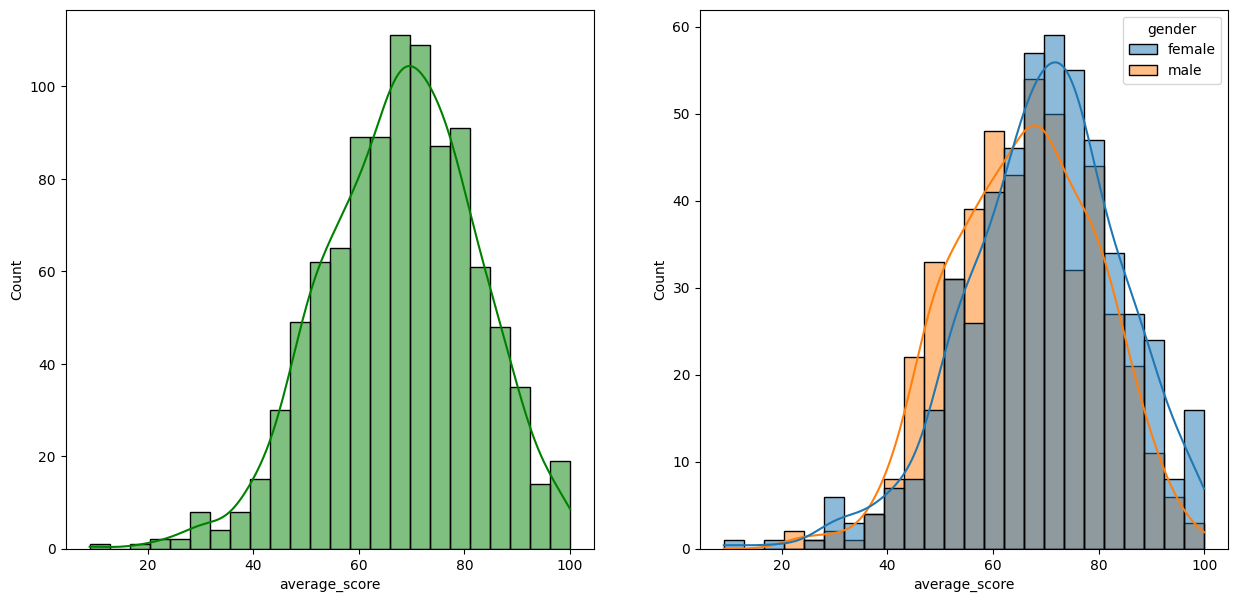

In [31]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average_score",kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",kde=True,hue='gender')
plt.show()